### Research Project #2

#### Student: Colter Uscola

#### Date: 03/25/2023

### The Motivation


Discourse related to brainwashing and mental manipulation have long been a bridge between scholars of many disciplines and the public. From a historical standpoint, brainwashing has often been associated with prisoners of war and cultist movements, providing an opportunity for psychologist and historians alike to engage the public with their research. However, this has many unforseen consequences for both academics and society. Another group of individuals who have been labeled as cultists by both the public and scholars is members of Alcoholics Anonymous. Scholars have long discredited the narratives of individuals who participate in substance use recovery programs due to this very reason. One issue at hand, among many, is whether or not individuals can leverage various cultural knowledge across contexts. Research on social networks and social capital suggests, yes (Erickson 1996), but this is still debated today and often leads to rejection of valid academic research. 

Among many arguments, I will focus on those most related to cult surviviors. That is, that recovery programs superimpose a worldview upon participants, something that participants are unable "set aside" when discussing their alcohol use. For some scholars of social research (cf. Glassman, Rhodes, and Buus 2020), they percieve this as the program of Alcoholics Anonymous "brainwashing" individuals to such a degree that the pre-recovery self, and experiences and memories associated with it, becomes seemingly unintelligable. However, research on cults and prisoners of war detail that percieved brainwashing is more often a coping mechanism than a mental state, and seems to only exist as long as individuals remain in contexts (Williams 2020). Therefore, through the case of AA, I will speak to this phenomenon by comparing word count ratios across four datasets all related to AA.

### Data

My dataset consists of two texts (i.e., Alcoholics Anonymous and Twelve Steps and Twelve Traditions), 42 stories from members of AA, 36 interview transcripts between members of AA, and 16 interviews with a researcher. All of this was gathered through open access archives on the internet. The texts were downloaded from aa-netherlands.org, the stories were extracted from key texts downloaded from aa-netherlands.org, the member interviews were collected from soberspeak.com, and the interviews with a researcher were taken in summer of 2021. I will discuss each set of data below.  

### Texts

Alcoholics Anonymous is a text that outlines the program of Alcoholics Anonymous, it is sometimes referred to as "The Big Book". It is made up of the first 164 pages of the Big Book and provides detailed instructions as to the principles of AA, the traditions, and the problem of alcoholism, as the program sees it. Twelve Steps and Twelve Traditions is a text which summarizes the content of the Big Book, focusing on the essential elements which need to be understood to maintain sobriety. From this, there are three legacies which relate to fellowship (AA members), service (community service and volunteer work), and recovery (following the 12 steps to the best of one's ability). These are the texts which outline the worldwide program of Alcoholics Anonymous, having been translated to over 100 languages. This is the english version.

### Stories

These stories come from the Big Book of Alcholics Anonymous. There are 42 stories that are from past or current members of AA. They are broken into three sections which are based upon the severity of the alcohol use. These are often framed in the rooms of AA as being promotional in the sense that potential members may identify with a story, then integrate the message contained within to self. Therefore, these stories are intended to be representative of members of AA in general.

### Interviews among members

During the lockdowns during the Covid-19 pandemic, many AA recovery rooms around the world were closed, which contributed to an influx of once sober individuals drinking again. To counter this, indivdiuals began posting their stories and experiences online, often through audio recordings, but others as transcripts. SoberSpeak provided one outlet for these. It was a general podcast that, although not directly affiliated with Alcoholics Anonymous, invited high status members to interviews to discuss their stories of consumption and sobriety. There are 36 transcripts on the website with the average length of sobriety time at 33.69 years. This ranged from 9 to 63 years of sobriety. Therefore, many of these individuals are percieved by the recovery community of spreading the precise message of Alcoholics Anonymous. This was the topic of the interviews.

### Interviews with researcher

This data came from 16 transcribed interviews with members of an alcohol recovery community in Vancouver, BC. Interviews ranged from 60 to 145 minutes with an average of 104 minutes. There were nine self-identified females and seven males. There were 13 White, three people of color, eight college grads, and they ranged in age from 26-85 years old. Their sobriety ranged from 5 days up to 45 years with an average of 5.6 years. Though there is no specified timeline for working through the 12 steps, it is an unwritten rule that they should be completed within the first year, or one step per month. The topic of the interviews were associated with drinking in general and specific experiences and emotions which contributed to it. 

### Steps toward analysis

This project intended (because I had a major coding setback, taking up multiple days) to analyze four sets of data related to recovery programs: central texts of Alcoholics Anonymous; interviews given by high status members of AA to other members; stories written in print from members of AA detailing their experience with alcohol use; and interview data from members of AA that are associated with their alcohol use. In this way, I sought to gather the most characteristic features of AA and create a word ratio score through supervised machine learning. This would investigate the characteristic features of the program of AA and provide a proportion of the themes across the text. I would then go on to calculate the proportion of these themes across the other three sets of data. As I have some experience with AA and conducted research with a sample of AA members, I use an abductive approach in which I gather the 55 central features (keywords) of the text of AA and narrow this down to a set of 25 keywords. From there, I investigate the other documents with the ratio score I developed, first revealing whether individuals utilize their cultural knowledge related to AA in the rooms of AA, and, second, to see if participants offer a more 'folk' understanding of drinking when discussing it with a researcher. 

###### I used many stackoverflow.com blogs to work through debugging. Something I am unable to debug is my 'stories' file. It is split by letter instead of by token. I have tried rewriting many sections of code, almost all, multiple times trying to locate the error. I cannot find it.

In [9]:
import glob
import os

# To access each text file, I first input the paths to each text file contained in a folder using this code.

text_path = '../Advanced Methods/Data/AA_Texts/*.txt'
speaker_path = '../Advanced Methods/Data/AA_Speakers/*.txt'
stories_path = '../Advanced Methods/Data/AA_Stories/*.txt'
drinker_path = '../Advanced Methods/Data/DrinkerID_Transcripts/*.txt'

# I then give access to the files within those folders.

text_files = glob.glob(text_path)
speaker_files = glob.glob(speaker_path)
stories_files = glob.glob(stories_path)
drinker_files = glob.glob(drinker_path)

# I import the stopwords list and extend it to remove unneeded words from the text files when I tokenize the files below

from nltk.corpus import stopwords
extra_stopwords = ['inaudible', 'umm', 'int', 'fuck', "’", "ummm", "ok", "mm", "uhhh", "laughs", "par","mhm", "“", "fucked", "participant", "interviewer", "ohhh", "hmmm", "wanna", "pauses", "mmm", "fuckin"]
stop_words = stopwords.words('english')
stop_words.extend(extra_stopwords)

In [13]:
# This allows for the texts to be read in the file while encoding them to utf-8, and then guiding the process by including 
# for file_name in text_files, also called list comprehension. I then set up the files so I remove the path information
# and the .txt. I also collect the data into multiple dataframes. I orginally concatenated the dataframes into a single 
# dataframe and was going to compare across the datasets, but this proved to me more difficult that I had anticipated
# so I stuck to what I knew and kept the files separate. I then tried to remove numbers from the files, but only some 
# were removed. I thought this may be because they are not integer types, so I tried another code, but it did not work
# either. The final code is the word_tokenize function which I use below.

text_texts = [open(file_name, encoding='utf-8').read() for file_name in text_files]
speaker_texts = [open(file_name, encoding='utf-8').read() for file_name in speaker_files]
stories_texts = [open(file_name, encoding='utf-8').read() for file_name in stories_files]
drinker_texts = [open(file_name, encoding='utf-8').read() for file_name in drinker_files]

text_files = [val[34:-4] for val in text_files]
text_files = [i.title() for i in text_files]

speaker_files = [val[37:-4] for val in speaker_files]
speaker_files = [i.title() for i in speaker_files]

stories_files = [val[36:-4] for val in stories_files]
stories_files = [i.title() for i in stories_files]

drinker_files = [val[35:-4] for val in drinker_files]
drinker_files = [i.title() for i in drinker_files]

text_data = {'File':text_files, 'Texts':text_texts}
speaker_data = {'File':speaker_files, 'Speaker_Text':speaker_texts}
stories_data = {'File':stories_files, 'Story_Text':stories_texts}
drinker_data = {'File':drinker_files, 'Drinker_Text':drinker_texts}

import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk

text_df = pd.DataFrame(text_data)
speaker_df = pd.DataFrame(speaker_data)
stories_df = pd.DataFrame(stories_data)
drinker_df = pd.DataFrame(drinker_data)

speaker_df_subset = speaker_df[['File', 'Speaker_Text']].copy()
speaker_df_subset['Speaker_Text'] = speaker_df_subset['Speaker_Text'].str.replace("[^a-zA-Z#]", " ")
speaker_df_subset['Speaker_Text'] = speaker_df_subset['Speaker_Text'].str.casefold()

drinker_df_subset = drinker_df[['File', 'Drinker_Text']].copy()
drinker_df_subset['Drinker_Text'] = drinker_df_subset['Drinker_Text'].str.replace("[^a-zA-Z#]", " ")
drinker_df_subset['Drinker_Text'] = drinker_df_subset['Drinker_Text'].str.casefold()

stories_df_subset = stories_df[['File', 'Story_Text']].copy()
stories_df_subset['Story_Text'] = stories_df_subset['Story_Text'].str.replace("[^a-zA-Z#]", " ")
stories_df_subset['Story_Text'] = stories_df_subset['Story_Text'].str.casefold()

text_df_subset = text_df[['File', 'Texts']].copy()
text_df_subset['Texts'] = text_df_subset['Texts'].str.replace("[^a-zA-Z#]", " ")
text_df_subset['Texts'] = text_df_subset['Texts'].str.casefold()

def word_tokenize(text):
    text = text.lower()
    text_clean = ''.join([e for e in text if e not in punct_list])
    text_token =  text_clean.split()
    text_token_clean = [word for word in text_token if word not in stop_words]
    return text_token_clean

/var/folders/kg/xf2t0fbn6079g58x6nh9gy5c0000gn/T/ipykernel_47943/3468804747.py:40: FutureWarning: The default value of regex will change from True to False in a future version.
  speaker_df_subset['Speaker_Text'] = speaker_df_subset['Speaker_Text'].str.replace("[^a-zA-Z#]", " ")
/var/folders/kg/xf2t0fbn6079g58x6nh9gy5c0000gn/T/ipykernel_47943/3468804747.py:44: FutureWarning: The default value of regex will change from True to False in a future version.
  drinker_df_subset['Drinker_Text'] = drinker_df_subset['Drinker_Text'].str.replace("[^a-zA-Z#]", " ")
/var/folders/kg/xf2t0fbn6079g58x6nh9gy5c0000gn/T/ipykernel_47943/3468804747.py:48: FutureWarning: The default value of regex will change from True to False in a future version.
  stories_df_subset['Story_Text'] = stories_df_subset['Story_Text'].str.replace("[^a-zA-Z#]", " ")
/var/folders/kg/xf2t0fbn6079g58x6nh9gy5c0000gn/T/ipykernel_47943/3468804747.py:52: FutureWarning: The default value of regex will change from True to False in a fut

In [14]:
# cleaning all text files and removing punctuation.

from nltk.corpus import stopwords
import string
punctuation = list(string.punctuation)
punctuation.append('\n')
punctuation.append('..')
punctuation

drinker_texts_clean = []

for text in drinker_texts:
    for character in text:
        if character in punctuation:
            text = text.replace(character," ")
    drinker_texts_clean.append(text)


speaker_texts_clean = []

for text in speaker_texts:
    for character in text:
        if character in punctuation:
            text = text.replace(character," ")
    speaker_texts_clean.append(text)
    
speaker_text_clean = [x for x in speaker_texts_clean if not isinstance(x, int)]

stories_texts_clean = []

for text in stories_texts:
    for character in text:
        if character in punctuation:
            text = text.replace(character," ")
    stories_texts_clean.append(text)
    

text_texts_clean = []

for text in text_texts:
    for character in text:
        if character in punctuation:
            text = text.replace(character," ")
    text_texts_clean.append(text)

In [15]:
# I then gather all texts into a single set using this code.
all_texts = text_texts + speaker_texts + stories_texts + drinker_texts

In [16]:
# this puts all file names together into a single file

all_file_names = text_files + speaker_files + stories_files + drinker_files

In [17]:
#importing sklearn and creating DTM.

from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

sklearn_dtm = countvec.fit_transform(all_texts)

In [18]:
# I erased a few cells, I defined the function to create a dtm. Because one of the files is a small number of
# documents, I reduced the number of documents that it needed to be included in to 6. I tested this with a value of 8
# and the odds_ratio and top 55 came back as almost half numbers for the texts.
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
cv = CountVectorizer(stop_words = 'english', min_df=6, binary = True, max_features = None)
dtm = cv.fit_transform(all_texts).toarray()
feature_list = cv.get_feature_names_out()
dtm_df = pd.DataFrame(dtm, columns = feature_list, index = all_file_names)

In [19]:
all_labels = ['text'] * len(text_texts) + ['speaker'] * len(speaker_texts) + ['stories'] * len(stories_texts) + ['drinker'] * len(drinker_texts)

In [20]:
# This section, I made the tokenize the text files by making them lower case, and then tokenized from words in lower case.
# then, I removed stop words and saved the word frequency counts as a new variable.

speaker_texts_lower = [texts.lower() for texts in speaker_texts_clean]
stories_texts_lower = [texts.lower() for texts in stories_texts_clean]
drinker_texts_lower = [texts.lower() for texts in drinker_texts_clean]
text_texts_lower = [texts.lower() for texts in text_texts_clean]

punct_list = list(string.punctuation)

speaker_tokens = [word_tokenize(words) for words in speaker_texts_lower]
stories_tokens = [word_tokenize(words) for words in stories_texts_lower]
drinker_tokens = [word_tokenize(words) for words in drinker_texts_lower]
text_tokens = [word_tokenize(words) for words in text_texts_lower]

speaker_tokens_all = []
for elements in speaker_tokens:
    for word in elements:
        speaker_tokens_all.append(word)
        
stories_tokens_all = []
for elements in stories_tokens:
    for word in elements:
        stories_tokens_all.append(word)
        
drinker_tokens_all = []
for elements in drinker_tokens:
    for word in elements:
        drinker_tokens_all.append(word)
        
text_tokens_all = []
for elements in text_tokens:
    for word in elements:
        text_tokens_all.append(word)
        
speaker_tokens_all_clean = [words for words in speaker_tokens_all if words not in stop_words]
stories_tokens_all_clean = [words for words in stories_tokens_all if words not in stop_words]
drinker_tokens_all_clean = [words for words in drinker_tokens_all if words not in stop_words]
text_tokens_all_clean = [words for words in text_tokens_all if words not in stop_words]

speaker_word_frequency = nltk.FreqDist(speaker_tokens_all_clean)
text_word_frequency = nltk.FreqDist(text_tokens_all_clean)
drinker_word_frequency = nltk.FreqDist(drinker_tokens_all_clean)
stories_word_frequency = nltk.FreqDist(stories_tokens_all_clean)

In [21]:
# Using sklearn and MultinomialNB to create most informative features function.

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(dtm, all_labels)

def most_informative_features(text_class, vectorizer = cv, classifier = nb, top_n = 55):

    import numpy as np

    feature_names = vectorizer.get_feature_names_out()
    class_index = np.where(classifier.classes_==(text_class))[0][0]
    
    class_prob_distro = np.exp(classifier.feature_log_prob_[class_index])
    alt_class_prob_distro = np.exp(classifier.feature_log_prob_[1 - class_index])
    
    odds_ratios = class_prob_distro / alt_class_prob_distro
    odds_with_fns = sorted(zip(odds_ratios, feature_names), reverse = True)
    
    return odds_with_fns[:top_n]

In [22]:
#From this list, I abductively drew upon terms which I know have relevance for AA, while also including some words which
#surprised me.
most_informative_features('text')

[(9.030864981582633, 'zero'),
 (9.030864981582633, 'victory'),
 (9.030864981582633, 'underlying'),
 (9.030864981582633, 'thinks'),
 (9.030864981582633, 'tendency'),
 (9.030864981582633, 'sum'),
 (9.030864981582633, 'submit'),
 (9.030864981582633, 'stepping'),
 (9.030864981582633, 'stem'),
 (9.030864981582633, 'specific'),
 (9.030864981582633, 'severely'),
 (9.030864981582633, 'sensitive'),
 (9.030864981582633, 'sacrifice'),
 (9.030864981582633, 'ruin'),
 (9.030864981582633, 'requirement'),
 (9.030864981582633, 'reliance'),
 (9.030864981582633, 'relapse'),
 (9.030864981582633, 'regarding'),
 (9.030864981582633, 'reflection'),
 (9.030864981582633, 'realm'),
 (9.030864981582633, 'range'),
 (9.030864981582633, 'pulling'),
 (9.030864981582633, 'prefer'),
 (9.030864981582633, 'practices'),
 (9.030864981582633, 'practical'),
 (9.030864981582633, 'points'),
 (9.030864981582633, 'plays'),
 (9.030864981582633, 'pause'),
 (9.030864981582633, 'partners'),
 (9.030864981582633, 'outward'),
 (9.03086

In [23]:
#Considering Zipf's Law, I focused on words which occured near the middle of this list. 
text_word_frequency = nltk.FreqDist(text_tokens_all_clean)
text_word_frequency.most_common(100)

[('us', 506),
 ('may', 339),
 ('god', 260),
 ('one', 252),
 ('would', 236),
 ('alcoholics', 236),
 ('alcoholic', 219),
 ('step', 215),
 ('people', 200),
 ('could', 199),
 ('many', 186),
 ('drinking', 176),
 ('life', 159),
 ('first', 152),
 ('man', 151),
 ('time', 145),
 ('spiritual', 138),
 ('like', 134),
 ('much', 134),
 ('good', 130),
 ('still', 130),
 ('”', 128),
 ('way', 127),
 ('upon', 126),
 ('family', 126),
 ('others', 125),
 ('self', 122),
 ('new', 121),
 ('see', 121),
 ('even', 120),
 ('anonymous', 120),
 ('make', 120),
 ('well', 119),
 ('men', 114),
 ('power', 111),
 ('take', 110),
 ('must', 106),
 ('drink', 106),
 ('think', 104),
 ('never', 103),
 ('often', 102),
 ('made', 99),
 ('go', 98),
 ('though', 98),
 ('another', 97),
 ('find', 95),
 ('let', 93),
 ('things', 92),
 ('every', 91),
 ('found', 91),
 ('work', 89),
 ('day', 89),
 ('know', 88),
 ('experience', 88),
 ('might', 84),
 ('great', 83),
 ('sometimes', 81),
 ('get', 81),
 ('thought', 80),
 ('better', 80),
 ('done', 

### Creation of Ratios Across DataFrames

Here, I use the word frequency to compare occurrences of cultural words to the total number of words in the files. If I were to continue in this direction, I would find the most frequently used words throughout the text, speakers, and stories and compare them to the AA Interview participants to see if there is a lot of overlap. However, because I am struggling to get the ratio for the story files, I will hold off until I can work out that code.  

In [25]:
print("RATIOS FOR WORD COUNTS IN TEXT FILES")
print("ratio of 'relapse' usage in text:", text_word_frequency['relapse']/len(text_tokens_all))

print("ratio of 'ruin' usage in text:", text_word_frequency['ruin']/len(text_tokens_all))

print("ratio of 'jealous' usage in text:", text_word_frequency['jealous']/len(text_tokens_all))

print("ratio of 'mistakes' usage in text:", text_word_frequency['mistakes']/len(text_tokens_all))

print("ratio of 'damaged' usage in text:", text_word_frequency['damaged']/len(text_tokens_all))

print("ratio of 'problem' usage in text:", text_word_frequency['problem']/len(text_tokens_all))

print("ratio of 'drowning' usage in text:", text_word_frequency['drowning']/len(text_tokens_all))

print("ratio of 'forgive' usage in text:", text_word_frequency['forgive']/len(text_tokens_all))

print("ratio of 'defects' usage in text:", text_word_frequency['defects']/len(text_tokens_all))

print("ratio of 'god' usage in text:", text_word_frequency['god']/len(text_tokens_all))

print("ratio of 'alcoholic' usage in text:", text_word_frequency['alcoholic']/len(text_tokens_all))

print("ratio of 'reliance' usage in text:", text_word_frequency['reliance']/len(text_tokens_all))

print("ratio of 'spiritual' usage in text:", text_word_frequency['spiritual']/len(text_tokens_all))

print("ratio of 'heartbreaking' usage in text:", text_word_frequency['heartbreaking']/len(text_tokens_all))

print("ratio of 'delusion' usage in text:", text_word_frequency['delusion']/len(text_tokens_all))

print("ratio of 'help' usage in text:", text_word_frequency['help']/len(text_tokens_all))

print("ratio of 'family' usage in text:", text_word_frequency['family']/len(text_tokens_all))

print("ratio of 'power' usage in text:", text_word_frequency['power']/len(text_tokens_all))

print("ratio of 'crushed' usage in text:", text_word_frequency['crushed']/len(text_tokens_all))

print("ratio of 'requirement' usage in text:", text_word_frequency['requirement']/len(text_tokens_all))

print("ratio of 'culture' usage in text:", text_word_frequency['culture']/len(text_tokens_all))

print("ratio of 'drinking' usage in text:", text_word_frequency['drinking']/len(text_tokens_all))

print("ratio of 'believe' usage in text:", text_word_frequency['believe']/len(text_tokens_all))

print("ratio of 'underlying' usage in text:", text_word_frequency['underlying']/len(text_tokens_all))

print("ratio of 'sacrifice' usage in text:", text_word_frequency['sacrifice']/len(text_tokens_all))

RATIOS FOR WORD COUNTS IN TEXT FILES
ratio of 'relapse' usage in text: 0.00017848491802442692
ratio of 'ruin' usage in text: 0.00017848491802442692
ratio of 'jealous' usage in text: 7.649353629618297e-05
ratio of 'mistakes' usage in text: 0.00020398276345648793
ratio of 'damaged' usage in text: 0.00017848491802442692
ratio of 'problem' usage in text: 0.0018358448711083913
ratio of 'drowning' usage in text: 5.099569086412198e-05
ratio of 'forgive' usage in text: 0.00015298707259236595
ratio of 'defects' usage in text: 0.0015298707259236595
ratio of 'god' usage in text: 0.006629439812335857
ratio of 'alcoholic' usage in text: 0.005584028149621357
ratio of 'reliance' usage in text: 0.0002294806088885489
ratio of 'spiritual' usage in text: 0.0035187026696244165
ratio of 'heartbreaking' usage in text: 0.00015298707259236595
ratio of 'delusion' usage in text: 0.00010199138172824396
ratio of 'help' usage in text: 0.002014329789132818
ratio of 'family' usage in text: 0.003212728524439685
ratio

In [26]:
print('RATIOS FOR WORD COUNTS IN SPEAKER INTERVIEWS')
print("ratio of 'relapse' usage in text:", speaker_word_frequency['relapse']/len(speaker_tokens_all_clean))

print("ratio of 'ruin' usage in text:", speaker_word_frequency['ruin']/len(speaker_tokens_all_clean))

print("ratio of 'jealous' usage in text:", speaker_word_frequency['jealous']/len(speaker_tokens_all_clean))

print("ratio of 'mistakes' usage in text:", speaker_word_frequency['mistakes']/len(speaker_tokens_all_clean))

print("ratio of 'damaged' usage in text:", speaker_word_frequency['damaged']/len(speaker_tokens_all_clean))

print("ratio of 'problem' usage in text:", speaker_word_frequency['problem']/len(speaker_tokens_all_clean))

print("ratio of 'drowning' usage in text:", speaker_word_frequency['drowning']/len(speaker_tokens_all_clean))

print("ratio of 'forgive' usage in text:", speaker_word_frequency['forgive']/len(speaker_tokens_all_clean))

print("ratio of 'defects' usage in text:", speaker_word_frequency['defects']/len(speaker_tokens_all_clean))

print("ratio of 'god' usage in text:", speaker_word_frequency['god']/len(speaker_tokens_all_clean))

print("ratio of 'alcoholic' usage in text:", speaker_word_frequency['alcoholic']/len(speaker_tokens_all_clean))

print("ratio of 'reliance' usage in text:", speaker_word_frequency['reliance']/len(speaker_tokens_all_clean))

print("ratio of 'spiritual' usage in text:", speaker_word_frequency['spiritual']/len(speaker_tokens_all_clean))

print("ratio of 'heartbreaking' usage in text:", speaker_word_frequency['heartbreaking']/len(speaker_tokens_all_clean))

print("ratio of 'delusion' usage in text:", speaker_word_frequency['delusion']/len(speaker_tokens_all_clean))

print("ratio of 'help' usage in text:", speaker_word_frequency['help']/len(speaker_tokens_all_clean))

print("ratio of 'family' usage in text:", speaker_word_frequency['family']/len(speaker_tokens_all_clean))

print("ratio of 'power' usage in text:", speaker_word_frequency['power']/len(speaker_tokens_all_clean))

print("ratio of 'crushed' usage in text:", speaker_word_frequency['crushed']/len(speaker_tokens_all_clean))

print("ratio of 'requirement' usage in text:", speaker_word_frequency['requirement']/len(speaker_tokens_all_clean))

print("ratio of 'culture' usage in text:", speaker_word_frequency['culture']/len(speaker_tokens_all_clean))

print("ratio of 'drinking' usage in text:", speaker_word_frequency['drinking']/len(speaker_tokens_all_clean))

print("ratio of 'believe' usage in text:", speaker_word_frequency['believe']/len(speaker_tokens_all_clean))

print("ratio of 'underlying' usage in text:", speaker_word_frequency['underlying']/len(speaker_tokens_all_clean))

print("ratio of 'sacrifice' usage in text:", speaker_word_frequency['sacrifice']/len(speaker_tokens_all_clean))

RATIOS FOR WORD COUNTS IN SPEAKER INTERVIEWS
ratio of 'relapse' usage in text: 8.148763832526606e-05
ratio of 'ruin' usage in text: 3.2595055330106425e-05
ratio of 'jealous' usage in text: 1.6297527665053212e-05
ratio of 'mistakes' usage in text: 0.0001222314574878991
ratio of 'damaged' usage in text: 1.6297527665053212e-05
ratio of 'problem' usage in text: 0.0015971577111752147
ratio of 'drowning' usage in text: 4.8892582995159634e-05
ratio of 'forgive' usage in text: 5.704134682768624e-05
ratio of 'defects' usage in text: 0.0002526116788083248
ratio of 'god' usage in text: 0.006861259146987402
ratio of 'alcoholic' usage in text: 0.0016460502941703743
ratio of 'reliance' usage in text: 0.0001548265128180055
ratio of 'spiritual' usage in text: 0.00134454603236689
ratio of 'heartbreaking' usage in text: 3.2595055330106425e-05
ratio of 'delusion' usage in text: 0.00020371909581316515
ratio of 'help' usage in text: 0.0013689923238644698
ratio of 'family' usage in text: 0.00083117391091771

In [28]:
print('RATIOS FOR WORD COUNTS IN DRINKER INTERVIEWS')
print("ratio of 'relapse' usage in text:", drinker_word_frequency['relapse']/len(drinker_tokens_all_clean))

print("ratio of 'ruin' usage in text:", drinker_word_frequency['ruin']/len(drinker_tokens_all_clean))

print("ratio of 'jealous' usage in text:", drinker_word_frequency['jealous']/len(drinker_tokens_all_clean))

print("ratio of 'mistakes' usage in text:", drinker_word_frequency['mistakes']/len(drinker_tokens_all_clean))

print("ratio of 'damaged' usage in text:", drinker_word_frequency['damaged']/len(drinker_tokens_all_clean))

print("ratio of 'problem' usage in text:", drinker_word_frequency['problem']/len(drinker_tokens_all_clean))

print("ratio of 'drowning' usage in text:", drinker_word_frequency['drowning']/len(drinker_tokens_all_clean))

print("ratio of 'forgive' usage in text:", drinker_word_frequency['forgive']/len(drinker_tokens_all_clean))

print("ratio of 'defects' usage in text:", drinker_word_frequency['defects']/len(drinker_tokens_all_clean))

print("ratio of 'god' usage in text:", drinker_word_frequency['god']/len(drinker_tokens_all_clean))

print("ratio of 'alcoholic' usage in text:", drinker_word_frequency['alcoholic']/len(drinker_tokens_all_clean))

print("ratio of 'reliance' usage in text:", drinker_word_frequency['reliance']/len(drinker_tokens_all_clean))

print("ratio of 'spiritual' usage in text:", drinker_word_frequency['spiritual']/len(drinker_tokens_all_clean))

print("ratio of 'heartbreaking' usage in text:", drinker_word_frequency['heartbreaking']/len(drinker_tokens_all_clean))

print("ratio of 'delusion' usage in text:", drinker_word_frequency['delusion']/len(drinker_tokens_all_clean))

print("ratio of 'help' usage in text:", drinker_word_frequency['help']/len(drinker_tokens_all_clean))

print("ratio of 'family' usage in text:", drinker_word_frequency['family']/len(drinker_tokens_all_clean))

print("ratio of 'power' usage in text:", drinker_word_frequency['power']/len(drinker_tokens_all_clean))

print("ratio of 'crushed' usage in text:", drinker_word_frequency['crushed']/len(drinker_tokens_all_clean))

print("ratio of 'requirement' usage in text:", drinker_word_frequency['requirement']/len(drinker_tokens_all_clean))

print("ratio of 'culture' usage in text:", drinker_word_frequency['culture']/len(drinker_tokens_all_clean))

print("ratio of 'drinking' usage in text:", drinker_word_frequency['drinking']/len(drinker_tokens_all_clean))

print("ratio of 'believe' usage in text:", drinker_word_frequency['believe']/len(drinker_tokens_all_clean))

print("ratio of 'underlying' usage in text:", drinker_word_frequency['underlying']/len(drinker_tokens_all_clean))

print("ratio of 'sacrifice' usage in text:", drinker_word_frequency['sacrifice']/len(drinker_tokens_all_clean))

RATIOS FOR WORD COUNTS IN DRINKER INTERVIEWS
ratio of 'relapse' usage in text: 4.702518668999116e-05
ratio of 'ruin' usage in text: 6.583526136598762e-05
ratio of 'jealous' usage in text: 6.583526136598762e-05
ratio of 'mistakes' usage in text: 9.405037337998232e-06
ratio of 'damaged' usage in text: 3.762014935199293e-05
ratio of 'problem' usage in text: 0.0008370483230818426
ratio of 'drowning' usage in text: 9.405037337998232e-06
ratio of 'forgive' usage in text: 1.8810074675996463e-05
ratio of 'defects' usage in text: 7.524029870398585e-05
ratio of 'god' usage in text: 0.0011097944058837913
ratio of 'alcoholic' usage in text: 0.0012508699659537648
ratio of 'reliance' usage in text: 0.0
ratio of 'spiritual' usage in text: 0.00018810074675996465
ratio of 'heartbreaking' usage in text: 9.405037337998232e-06
ratio of 'delusion' usage in text: 1.8810074675996463e-05
ratio of 'help' usage in text: 0.0007053778003498674
ratio of 'family' usage in text: 0.0015518311607697084
ratio of 'power

In [41]:
data = [['Believe', .00163, .00151, .00045], ['God', .00663, .00686, .00120], ['Spiritual', .00352, .00134, .00019], ['Power', .00283, .00135, .00033], ['Help', .00283, .00135, .00071], ['Family', .00321, .00083, .00155], ["Alcoholic", .00559, .00164, .00125], ['Drinking', .00448, .00180, .00521], ['Problem', .00184, .00160, .00083]]
df = pd.DataFrame(data, columns=['KeyWord', 'Text Ratio', 'Speaker Ratio', 'Drinker Ratio'])
df.index = ['Believe', 'God', 'Spiritual', 'Power', 'Help', 'Family', 'Alcoholic', 'Drinking', 'Problem']
df

,KeyWord,Text Ratio,Speaker Ratio,Drinker Ratio
Believe,Believe,0.00163,0.00151,0.00045
God,God,0.00663,0.00686,0.00120
Spiritual,Spiritual,0.00352,0.00134,0.00019
Power,Power,0.00283,0.00135,0.00033
Help,Help,0.00283,0.00135,0.00071
Family,Family,0.00321,0.00083,0.00155
Alcoholic,Alcoholic,0.00559,0.00164,0.00125
Drinking,Drinking,0.00448,0.00180,0.00521
Problem,Problem,0.00184,0.00160,0.00083


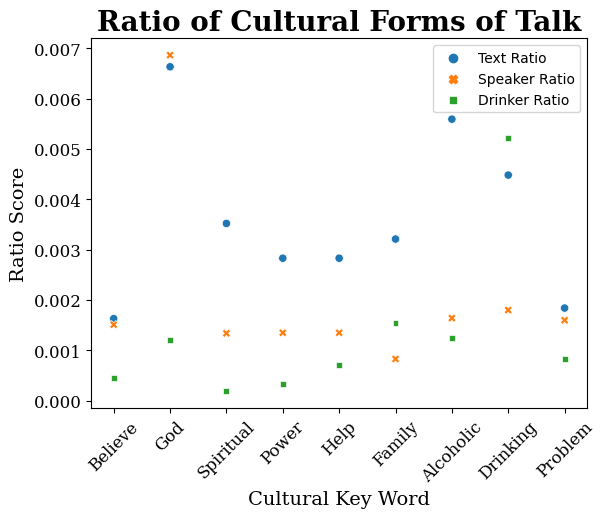

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df)

plt.title('Ratio of Cultural Forms of Talk', fontsize=20, family='serif', weight ='bold')
plt.xlabel("Cultural Key Word", fontsize=14, family = 'serif')
plt.xticks(fontsize=12, family='serif', rotation=45)
plt.ylabel('Ratio Score', fontsize=14, family='serif')
plt.yticks(fontsize=12, family='serif')


plt.show()

### Interpretation

As a component of supervised machine learning, I looked through the most informative features of the text of Alcoholics Anonymous and Twelve Steps and Twelve Traditions to determine the central keywords which are reflective of AA beliefs. From these, and as discussed throughout AA, many keywords related to spirituality and faith based practices, stemming from the Oxford Group, a Christian religious movement came about. Specifically: sacrifice, reflection, reliance, forgiving, forgiveness, submit, and forgive. We also see terms related to continued alcohol use: relapse, mistakes, mistaken, damaged, crushed, drowning, illusion, delusion. Then, we can see terms related to emotion: heartbreaking and jealous. Lastly, those related to society: culture and nation. From these, it seems, at least my interpretation of it is, that individuals may feel jealous or in a terrible condition in society or in a nation. They then are crushed, and they struggle to understand their place in the world, possibly drinking during this time. They are delusional and experience some illusion, contributing to mistakes and relapse after relapse. The answer is to sacrifice oneself through self reflection, to submit, and to rely upon something (higher power) that will lead to forgiveness and greater understanding. The word stepping is also included, as is stem, possibly suggesting that steps are a way to over come the illusion that stems from something in their past, maybe the experiences of feeling out of place in the world. 

Of the 25 keywords, 9 occur most frequently witin the text of AA. Those words are: problem, God, alcoholic, spiritual, help, family, power, drinking, and believe. Of these 9 words, 5 are used almost or more frequently by the Speakers of AA. These words are: problem, God, help, power, and believe. Family is barely mentioned, alcoholic is mentioned, but not nearly as often as the texts of AA, possibly because it is a stigmatizing term, and drinking is also rarely mentioned. This point on drinking is central to my analysis, as it is common practice in AA to not disclose one's "war stories" or discussion of one's personal drinking. However, this completely changes when investigating the narratives of my participants.

Among the 9 common words used to describe alcohol use and recovery, my participants only discuss two terms that relate to the text of AA: drinking and family. They also use the term alcoholic, but just below on par with the AA Speakers. This is interesting because it seems that social interaction outside the program of AA does reduce the frequency of the use of the term alcoholic, while increasing the use of the term drinking. To drink is normalized within broader society. To self-stigmatize is detrimental to one's well being. What is even more interesting is that I personally disclosed to my participants that I am a member of AA, therefore reducing tension that may be experienced. Even then, my participants opened up about their drinking although the program of AA dictates that we are not to discuss such things openly. This leads to evidence that individuals do engage in cultural forms of talk that vary across situations, even when primed to remember the program of Alcohoics Anonymous and the terminology that it provides.

### Connections to history and future research

When considering that Alcoholics Anonymous came about just at the end of prohibition, an image begins to form about specific social conflicts that may have contributed to sober individuals as belonging to a cult. Furthermore, as we see that this program stemmed from a religious movement that no longer exists, another layer to why individuals may stigmatize members of AA as cultists is presented. 

I very much intend to pursue this project further, maybe in two separate avenues. The first of which is more focused on the analysis component, while the second is centered on the connection between forms of talk within society that contribute to academic debates about validity of interview data with members of recovery communities. I think that, beyond my almost catastrophic setbacks, this is one component of a project that could produce to very fruitful contributions across a few disciplines. That being said, I think I need more data in each of these categories. 
Though this is a very minor analysis, given the amount of time I was left with after attempting to debug, it still opens a door for an expansive study which may draw upon Twitter, Reddit, or Facebook data, along with historical data related to the prohibition era, in an attempt to draw a link between rhetorics related to prohibition and Anti-prohibition groups to underscore why individuals use terminology like brainwashed to describe indivdiuals who no longer drink - often as a means to save one's own life. For example, this last clause is a phrase that I have heard used in meetings of AA (i.e., that alcoholics suffer from a life threatening disease). However, when many of my presonal friends passed away as a result of their consumption, I cannot help but believe that this is both a phrase that could be perceived as "brainwashing", by out-group members, that is very much a reality to in-group members. Therefore, determining the types of rhetoric that was used throughout Prohibition both in support of and against alcohol consumption could lead to a rich understanding about why scholars and the general public both continue a debate about whether or not AA, and the possible brainwashing that occurs there, is in fact a cult, discrediting both the individuals who partake in the program and the research that comes from it.

### Ethics

As I engaged in some level of data scraping for this project, I need to procede with caution and anonymize the transcripts and titles of the files. Although the podcast from which the speaker transcripts came from is not directly tied to AA, hosting speakers from the program jeapardizes their anonymity. Seeing as how they are very central figures to the program, it is likely that if the transcripts were release that the individuals would be identifiable from the interviews themselves. As I seek to do no harm in my research, while working with an at risk population, I need to do my best to remove as much identifying features of the data as possible. However, given that the text off AA and the stories come from an easily accessible book available at nearly any book store across North America, that data poses no risk to anyone. Lastly, as the data from my participants come from a community of AA members, I anonymized the transcripts prior to this investigation. As I am focused on central themes and cultural terms, rather than on the indivdiuals themselves, there is very low risk involved with this study.